In [1]:
# -----------------------------------------------------------
# HEART DISEASE PREDICTION USING KNN
# -----------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [13]:
#load data
df.info()
df.isnull().sum()
df.columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    int64  
 6   restecg   920 non-null    int64  
 7   thalch    920 non-null    float64
 8   exang     920 non-null    int64  
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    int64  
 11  ca        920 non-null    float64
 12  thal      920 non-null    int64  
 13  num       920 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 100.8 KB


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [3]:
#explore data
df.info()
df.isnull().sum()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [14]:
#conver LL TEXT COLUMNS TO NUM
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':   # convert text → numbers
        df[col] = le.fit_transform(df[col])



In [15]:
#drop unwabted columns 
for col in ["id", "dataset"]:
    if col in df.columns:
        df = df.drop(col, axis=1)



In [6]:
#convert target coulumn num to binary(0/1)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)



In [16]:
#Fix Missing Values (KNN Does NOT Allow NaN)
df = df.fillna(df.median(numeric_only=True))


In [17]:
#Split Features (X) and Target (y)
X = df.drop("num", axis=1)
y = df["num"]



In [18]:
#Train-Test Split
#80% of dataset used to train model
#20% used to test how well the model works
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)



In [19]:
#Scale the Features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [20]:
#Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


#Creates a KNN model with k = 5 neighbors

#fit() trains the model


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


KNN Accuracy: 0.7934782608695652


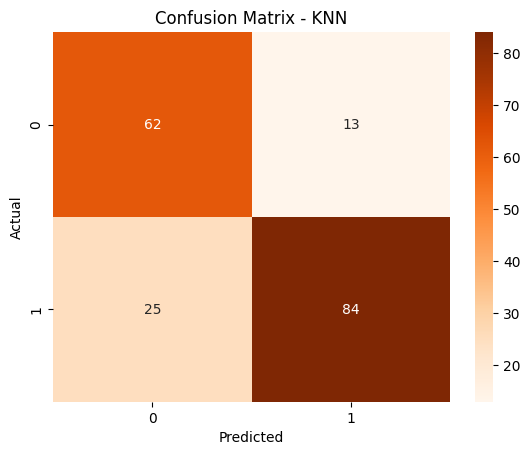


Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        75
           1       0.87      0.77      0.82       109

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.80       184



In [21]:
#Evaluate KNN Model
y_pred = knn.predict(X_test_scaled)

#Predicts whether patients have heart disease (0/1)
#Using test data

print("KNN Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


In [23]:
#Sample Patient Prediction
sample = {
    "age": 55,
    "sex": 1,
    "cp": 0,
    "trestbps": 130,
    "chol": 250,
    "fbs": 0,
    "restecg": 1,
    "thalch": 150,   # FIXED here
    "exang": 0,
    "oldpeak": 1.2,
    "slope": 2,
    "ca": 0,
    "thal": 2
}



In [24]:
sample_df = pd.DataFrame([sample])
sample_scaled = scaler.transform(sample_df)

result = knn.predict(sample_scaled)[0]

print("Prediction:", "Heart Disease (1)" if result == 1 else "No Heart Disease (0)")


Prediction: No Heart Disease (0)
